# Capstone Project - The Battle of the Neighborhoods (Week 2)
## Applied Data Science Capstone by IBM/Coursera
### Sydney - Food and Travel

*By Surya Soujanya Kodavalla*

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Future Direction](#future_direction)

## Introduction <a name="introduction"></a>

The purpose of this project is to identify the trending food ventures in each suburb of Sydney, Australia with accessible public transportation. Sydney has around 600 plus suburbs in the city with an excellent metro system and an amazing variety of cuisines available to gorge on. By calculating the distance from the nearest train stations and clustering restaurants based on this distance, anyone new to the beautiful city of Sydney can enjoy the food there without much of a hassle about transport. 

The above problem has been addressed by finding the trending food places in each suburb of Sydney which are closest to train stations. Specifically, this report will be targeted to travelers interested in visiting the top food places which are are convenient to travel to and from in Sydney. We are particularly focusing on the train stations in Sydney as their metro network is very reliable with services running from 4am to around midnight on most train lines. 

To do the analysis as mentioned above, initially a list of all the suburbs, all the train stations and the trending restaurants in Sydney are obtained. From this data, the nearest train station to each restaurant is found based on their locations and the distances calculated. After clustering the restaurants based on the distances previously calculated, we can come to a conclusion about the most accessible restaurants, etc.

Data science methodologies and the K-means clustering algorithm have been used to get useful data and generate different clusters of food places all over Sydney based on their distances from the nearest train stations.

In [61]:
import pandas as pd
import numpy as np

import requests
import csv

import json
from pandas.io.json import json_normalize

from geopy.geocoders import Nominatim 
from geopy.exc import GeocoderTimedOut
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

print('Libraries imported.')

Libraries imported.


## Data <a name="data"></a>

Based on definition of the problem, data needed for analysis is:
* list of suburbs in Sydney and their locations
* list of train stations in Sydney and their locations
* top food venues in different suburbs
* distance between food venues and the nearest train station

#### List of Suburbs in Sydney and their locations -

* Data for list of suburbs in Sydney was scraped from the [Wikipedia page](https://en.wikipedia.org/wiki/List_of_Sydney_suburbs) and it was cleaned by removing extra parts of the code from in between the data and other extra characters through multiple iterations. The scraped and cleaned list of suburbs was then made into a dataframe and stored as a csv file.

* While adding the latitudes and longitudes of each of the suburbs to the dataset, using the geopy package, the location 'Sydney, Australia' was added to the address to get the accurate location as there can possibly be many places with the same name in different cities.

* The link to the data set is available [here](https://www.kaggle.com/ssk27997/suburbs-in-sydney-australia).

* The link to the code used for scraping is available [here](https://github.com/surya-soujanya/Coursera_Capstone/blob/master/Suburbs_Scraping.ipynb).

In [62]:
sydney_suburbs = pd.read_csv('sydney_suburbs.csv')
sydney_suburbs.dropna(inplace=True)
sydney_suburbs.reset_index(inplace=True)
sydney_suburbs.drop(['index'],inplace=True,axis=1)
sydney_suburbs

,Suburb,Latitude,Longitude
0,Abbotsbury,-33.869285,150.866703
1,Abbotsford,-33.850553,151.129759
2,Acacia Gardens,-33.732459,150.912532
3,Agnes Banks,-33.614508,150.711448
4,Airds,-34.090000,150.826111
...,...,...,...
673,Yennora,-33.862008,150.968610
674,Yowie Bay,-34.050278,151.103333
675,Zetland,-33.907662,151.208218
676,Jordan Springs,-33.725022,150.727127


#### List of Train Stations in Sydney and their locations -

* Similar to the dataset for the suburbs, the dataset for the railway stations was scraped using beautifulsoup from the  [Wikipedia page](https://en.wikipedia.org/wiki/List_of_Sydney_Trains_railway_stations). It was cleaned by removing extra parts of the code from in between the data and other extra characters through multiple iterations. The words 'Railway Station' were added to each of the names of the stations to make locating them easier. The scraped and cleaned list of railway stations was then made into a dataframe and stored as a csv file.

* While adding the latitudes and longitudes of each of the stations to the dataset, using the geopy package, the location 'Sydney, Australia' was added to the address to get the accurate location as there can possibly be many places with the same name in different cities.

* The link to the data set is available [here](https://www.kaggle.com/ssk27997/train-stations-in-sydney-australia).

* The link to the code used for scraping is available [here](https://github.com/surya-soujanya/Coursera_Capstone/blob/master/Stations_Scraping.ipynb).

In [63]:
sydney_stations=pd.read_csv("sydney_stations.csv")
sydney_stations.dropna(inplace=True)
sydney_stations.reset_index(inplace=True)
sydney_stations.drop(['index'],inplace=True,axis=1)
sydney_stations

,Station,Latitude,Longitude
0,Mount Kuring-gai Railway Station,-33.653064,151.136886
1,Ingleburn Railway Station,-33.998333,150.851111
2,Yennora Railway Station,-33.862008,150.968610
3,Epping Railway Station,-33.772863,151.082090
4,Rooty Hill Railway Station,-33.768865,150.841180
...,...,...,...
163,Mulgrave Railway Station,-33.627219,150.831660
164,Croydon Railway Station,-33.877794,151.115650
165,Punchbowl Railway Station,-33.928717,151.052259
166,Mascot Railway Station,-33.928956,151.195178


In [64]:
#Obtain the latitude and longitude of Sydney
address = 'Sydney, Australia'
geolocator = Nominatim(user_agent="Sydney_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Sydney are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Sydney are -33.8548157, 151.2164539.


###### Visualization of the two data sets obtained above by plotting them on a map.

In [65]:
map_sydney = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, suburb in zip(sydney_suburbs['Latitude'], sydney_suburbs['Longitude'], sydney_suburbs['Suburb']):
    label = '{}'.format(suburb )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
        radius=3,
        popup=label,
        color='#1E90FF',
        fill=True,
        fill_color='#00BFFF',
        fill_opacity=0.8,
        parse_html=False).add_to(map_sydney)  

for lat, lng, station in zip(sydney_stations['Latitude'], sydney_stations['Longitude'], sydney_stations['Station']):
    label = '{}'.format(station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
        radius=5,
        popup=label,
        color='#008000',
        fill=True,
        fill_color='#3CB371	',
        fill_opacity=0.8,
        parse_html=False).add_to(map_sydney)  
    
map_sydney

#### Top food places and their locations - 

The food places in each suburb are obtained by using the Foursquare API on the suburbs dataset. The category ID for food places is used to return only the food places in the specified areas. The required details of each venue such as latitude and longitude are obtained from the json file generated.

In [66]:
import urllib
def getNearbyVenues(names, latitudes, longitudes, radius=3000, categoryIds=''):
    try:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):

            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
                                                                                                                                       CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

            if (categoryIds != ''):
                url = url + '&categoryId={}'
                url = url.format(categoryIds)

            response = requests.get(url).json()
            results = response["response"]['venues']
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
                except:
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        v['categories'][0]['name']
                    )])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    except:
        print(url)
        print(response)
        print(results)
        print(nearby_venues)

    return(nearby_venues)

In [69]:
CLIENT_ID = 'MW0HNMAAVZ2AHN2GJQVRURBGN5HEORAR0EVEYMKI10WYYNNM'
CLIENT_SECRET = 'DQ1ZEWFMCBKBC0311AJQE1T3HNSTQRP1RDVWOFZCVYLS20DB'
VERSION = '20180604'
LIMIT = 20

In [70]:
top_food_places = getNearbyVenues(names=sydney_suburbs['Suburb'], latitudes=sydney_suburbs['Latitude'], longitudes=sydney_suburbs['Longitude'], 
                                  radius=3000, categoryIds='4d4b7105d754a06374d81259')
#categoryIds is 4d4b7105d754a06374d81259 as it returns all the food places
top_food_places

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbotsbury,-33.869285,150.866703,Star Buffet (Club Marconi),-33.864698,150.879435,Buffet
1,Abbotsbury,-33.869285,150.866703,Hero Sushi,-33.858125,150.898700,Sushi Restaurant
2,Abbotsbury,-33.869285,150.866703,Soju,-33.857248,150.898864,Korean Restaurant
3,Abbotsbury,-33.869285,150.866703,McDonald's,-33.888236,150.881752,Fast Food Restaurant
4,Abbotsbury,-33.869285,150.866703,Maison Coffee,-33.871530,150.890440,Café
...,...,...,...,...,...,...,...
12419,South Granville,-33.857778,151.010556,Subway,-33.863021,151.044586,Sandwich Place
12420,South Granville,-33.857778,151.010556,Suliya Gogiya,-33.864365,151.044980,BBQ Joint
12421,South Granville,-33.857778,151.010556,I Love Manoush,-33.864015,151.045103,Pizza Place
12422,South Granville,-33.857778,151.010556,Darband Persian Restaraunt,-33.849675,151.034835,Persian Restaurant


## Methodology <a name="methodology"></a>

In this project, the plan is to cluster the food places based on their distances from the nearest railway stations.

In the first step, we collected the required data as shown above by data scraping, cleaning and using the geopy package and the Foursquare API.

The second step is the calculation and exploration of the nearest railway station to each food place and the distance between them. This data is then combined with the dataset of top food places that was previously obtained. To find the closest railway station to each restaurant, the distance between each restaurant returned by the call to the Foursquare API and train station is calculated using the geopy package. Then the station with the least distance is concluded to be the nearest station to each food place.

The third and final step will be focusing on clustering these food places based on their distances from the nearest railway stations and exploring the clusters made. A visualization of the clusters obtained will be made by plotting a few points of each cluster on a map along with the railway stations. The clusters obtained can be used to explore the restaurants and suburbs as per the requirement of the traveler.

In [71]:
venue_lats = top_food_places['Venue Latitude']
venue_longs=top_food_places['Venue Longitude']
station_lats=sydney_stations['Latitude']
station_longs=sydney_stations['Longitude']
stations=sydney_stations['Station']

a,b=top_food_places.shape
c,d=sydney_stations.shape

#changed due to issues with nan data
station_lats[72]=0
station_longs[72]=0

<ipython-input-71-4971e7bc470e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_lats[72]=0
<ipython-input-71-4971e7bc470e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_longs[72]=0


###### Calculation of the distance of the nearest railway station from each food place.

In [72]:
from geopy.distance import great_circle

nearest_station=[None] * a
distance= [None] * a

i=0
for i in range(a):
    venue=(venue_lats[i],venue_longs[i])
    dist=float('inf')
    j=0
    for j in range(c):
        station=(station_lats[j],station_longs[j])
        temp=great_circle(venue,station).km
        if(temp<dist):
            dist = temp
            distance[i] = temp
            nearest_station[i]=stations[j]

In [73]:
len(nearest_station)

12424

In [74]:
len(distance)

12424

In [75]:
#Combine the calculations obtained with the dataset previously used
top_food_places.insert(loc=7,column="Nearest Station",value=nearest_station) 
top_food_places.insert(loc=8,column="Distance to Nearest Station in km",value=distance) 
top_food_places

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Nearest Station,Distance to Nearest Station in km
0,Abbotsbury,-33.869285,150.866703,Star Buffet (Club Marconi),-33.864698,150.879435,Buffet,Cabramatta Railway Station,6.306210
1,Abbotsbury,-33.869285,150.866703,Hero Sushi,-33.858125,150.898700,Sushi Restaurant,Fairfield Railway Station,5.215823
2,Abbotsbury,-33.869285,150.866703,Soju,-33.857248,150.898864,Korean Restaurant,Fairfield Railway Station,5.232940
3,Abbotsbury,-33.869285,150.866703,McDonald's,-33.888236,150.881752,Fast Food Restaurant,Cabramatta Railway Station,4.991601
4,Abbotsbury,-33.869285,150.866703,Maison Coffee,-33.871530,150.890440,Café,Cabramatta Railway Station,5.037616
...,...,...,...,...,...,...,...,...,...
12419,South Granville,-33.857778,151.010556,Subway,-33.863021,151.044586,Sandwich Place,Lidcombe Railway Station,0.100870
12420,South Granville,-33.857778,151.010556,Suliya Gogiya,-33.864365,151.044980,BBQ Joint,Lidcombe Railway Station,0.158246
12421,South Granville,-33.857778,151.010556,I Love Manoush,-33.864015,151.045103,Pizza Place,Lidcombe Railway Station,0.118170
12422,South Granville,-33.857778,151.010556,Darband Persian Restaraunt,-33.849675,151.034835,Persian Restaurant,Auburn Railway Station,1.014216


###### Clustering the food places based on the distances to the nearest railway station.

In [76]:
clustering = pd.DataFrame(columns=['Distance to Nearest Station in km'])
clustering['Distance to Nearest Station in km'] = top_food_places['Distance to Nearest Station in km']
kmeans = KMeans(n_clusters=5, random_state=0).fit(clustering)

In [77]:
clusters = kmeans.labels_
len(clusters)

12424

In [78]:
top_food_places.insert(loc=9,column="Cluster Labels",value=clusters) 
top_food_places

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Nearest Station,Distance to Nearest Station in km,Cluster Labels
0,Abbotsbury,-33.869285,150.866703,Star Buffet (Club Marconi),-33.864698,150.879435,Buffet,Cabramatta Railway Station,6.306210,2
1,Abbotsbury,-33.869285,150.866703,Hero Sushi,-33.858125,150.898700,Sushi Restaurant,Fairfield Railway Station,5.215823,2
2,Abbotsbury,-33.869285,150.866703,Soju,-33.857248,150.898864,Korean Restaurant,Fairfield Railway Station,5.232940,2
3,Abbotsbury,-33.869285,150.866703,McDonald's,-33.888236,150.881752,Fast Food Restaurant,Cabramatta Railway Station,4.991601,2
4,Abbotsbury,-33.869285,150.866703,Maison Coffee,-33.871530,150.890440,Café,Cabramatta Railway Station,5.037616,2
...,...,...,...,...,...,...,...,...,...,...
12419,South Granville,-33.857778,151.010556,Subway,-33.863021,151.044586,Sandwich Place,Lidcombe Railway Station,0.100870,0
12420,South Granville,-33.857778,151.010556,Suliya Gogiya,-33.864365,151.044980,BBQ Joint,Lidcombe Railway Station,0.158246,0
12421,South Granville,-33.857778,151.010556,I Love Manoush,-33.864015,151.045103,Pizza Place,Lidcombe Railway Station,0.118170,0
12422,South Granville,-33.857778,151.010556,Darband Persian Restaraunt,-33.849675,151.034835,Persian Restaurant,Auburn Railway Station,1.014216,0


## Analysis <a name="analysis"></a>

Some basic explanatory data analysis is done after clustering. The details of the clusters are obtained to understand the range covered by each cluster.

In [79]:
top_food_places['Cluster Labels'].value_counts()

0    7503
4    2499
2    1217
1     766
3     439
Name: Cluster Labels, dtype: int64

In [80]:
cluster_0 = pd.DataFrame()
cluster_0 = top_food_places.loc[(top_food_places['Cluster Labels'] == 0)]
describe_0 = cluster_0['Distance to Nearest Station in km'].describe()
describe_0

count    7503.000000
mean        0.583307
std         0.394955
min         0.008342
25%         0.239972
50%         0.487341
75%         0.869333
max         1.612707
Name: Distance to Nearest Station in km, dtype: float64

In [81]:
cluster_1 = pd.DataFrame()
cluster_1 = top_food_places.loc[(top_food_places['Cluster Labels'] == 1)]
describe_1 = cluster_1['Distance to Nearest Station in km'].describe()
describe_1

count    766.000000
mean       9.072404
std        1.297089
min        7.204270
25%        8.053120
50%        8.791494
75%        9.681568
max       12.355477
Name: Distance to Nearest Station in km, dtype: float64

In [82]:
cluster_2 = pd.DataFrame()
cluster_2 = top_food_places.loc[(top_food_places['Cluster Labels'] == 2)]
describe_2 = cluster_2['Distance to Nearest Station in km'].describe()
describe_2

count    1217.000000
mean        5.300910
std         0.844189
min         3.978598
25%         4.507792
50%         5.224042
75%         5.963021
max         7.182159
Name: Distance to Nearest Station in km, dtype: float64

In [83]:
cluster_3 = pd.DataFrame()
cluster_3 = top_food_places.loc[(top_food_places['Cluster Labels'] == 3)]
describe_3 = cluster_3['Distance to Nearest Station in km'].describe()
describe_3

count    439.000000
mean      15.733215
std        2.392749
min       12.467723
25%       14.353781
50%       16.154244
75%       16.797562
max       29.373290
Name: Distance to Nearest Station in km, dtype: float64

In [84]:
cluster_4 = pd.DataFrame()
cluster_4 = top_food_places.loc[(top_food_places['Cluster Labels'] == 4)]
describe_4 = cluster_4['Distance to Nearest Station in km'].describe()
describe_4

count    2499.000000
mean        2.652122
std         0.649552
min         1.620442
25%         2.116595
50%         2.642561
75%         3.210527
max         3.938854
Name: Distance to Nearest Station in km, dtype: float64

###### Visualization of the ranges of distances covered by each cluster.

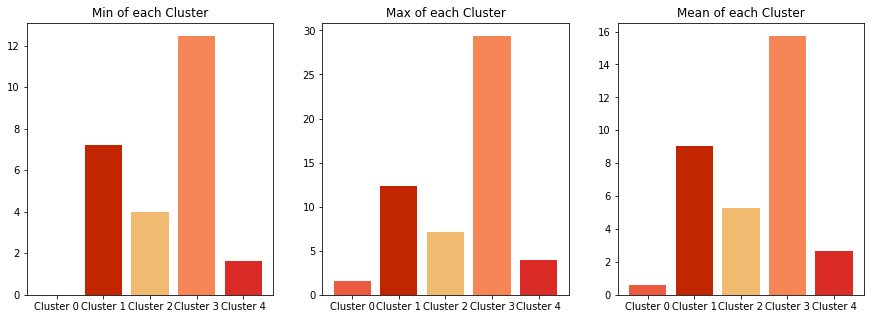

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4'],
        [describe_0.iloc[3],describe_1.iloc[3],describe_2.iloc[3],describe_3.iloc[3],describe_4.iloc[3]],color=('#EA5A3E', '#C12600', '#F0BA70', '#F68656','#DA2B27'))
plt.title('Min of each Cluster')
plt.subplot(132)
plt.bar(['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4'],
        [describe_0.iloc[7],describe_1.iloc[7],describe_2.iloc[7],describe_3.iloc[7],describe_4.iloc[7]],color=('#EA5A3E', '#C12600', '#F0BA70', '#F68656','#DA2B27'))
plt.title('Max of each Cluster')
plt.subplot(133)
plt.bar(['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4'], 
        [describe_0.iloc[1],describe_1.iloc[1],describe_2.iloc[1],describe_3.iloc[1],describe_4.iloc[1]],color=('#EA5A3E', '#C12600', '#F0BA70', '#F68656','#DA2B27'))
plt.title('Mean of each Cluster')
plt.show()

In [86]:
cluster_0=cluster_0.head(50)
cluster_1=cluster_1.head(50)
cluster_2=cluster_2.head(50)
cluster_3=cluster_3.head(50)
cluster_4=cluster_4.head(50)

###### Visualization of a few points from each of the clusters.

In [87]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

rainbow = ['#1ec4dc','#4d6fbe','#369acd','#6644af','#07efeb']

for lat, lon, venue, cluster,suburb in zip(cluster_0['Venue Latitude'], cluster_0['Venue Longitude'], cluster_0['Venue'],cluster_0['Cluster Labels'],cluster_0['Suburb']):
    label = folium.Popup(venue +', '+ suburb + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[0],
        fill=True,
        fill_color=rainbow[0],
        fill_opacity=0.8).add_to(map_clusters)

for lat, lon, venue, cluster,suburb in zip(cluster_1['Venue Latitude'], cluster_1['Venue Longitude'], cluster_1['Venue'],cluster_1['Cluster Labels'],cluster_1['Suburb']):
    label = folium.Popup(venue +', '+ suburb + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[1],
        fill=True,
        fill_color=rainbow[1],
        fill_opacity=0.8).add_to(map_clusters)
           
for lat, lon, venue, cluster,suburb in zip(cluster_2['Venue Latitude'], cluster_2['Venue Longitude'], cluster_2['Venue'],cluster_2['Cluster Labels'],cluster_2['Suburb']):
    label = folium.Popup(venue +', '+ suburb + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[2],
        fill=True,
        fill_color=rainbow[2],
        fill_opacity=0.8).add_to(map_clusters)
           
for lat, lon, venue, cluster,suburb in zip(cluster_3['Venue Latitude'], cluster_3['Venue Longitude'], cluster_3['Venue'],cluster_3['Cluster Labels'],cluster_3['Suburb']):
    label = folium.Popup(venue +', '+ suburb + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[3],
        fill=True,
        fill_color=rainbow[3],
        fill_opacity=0.8).add_to(map_clusters)
       
for lat, lon, venue, cluster,suburb in zip(cluster_4['Venue Latitude'], cluster_4['Venue Longitude'], cluster_4['Venue'],cluster_4['Cluster Labels'],cluster_4['Suburb']):
    label = folium.Popup(venue +', '+ suburb + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[4],
        fill=True,
        fill_color=rainbow[4],
        fill_opacity=0.8).add_to(map_clusters)
    
for lat, lng, station in zip(sydney_stations['Latitude'], sydney_stations['Longitude'], sydney_stations['Station']):
    label = '{}'.format(station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
        radius=3,
        popup=label,
        color='#008000',
        fill=True,
        fill_color='#3CB371	',
        fill_opacity=0.9,
        parse_html=False).add_to(map_clusters)  
    
map_clusters

In [91]:
clusters = pd.DataFrame()
clusters= top_food_places.loc[(top_food_places['Cluster Labels'] == 0)]
subs =clusters['Suburb'].value_counts()
stats =clusters['Nearest Station'].value_counts()

In [95]:
subs

Woolooware       20
Strathfield      20
Lavender Bay     20
Wolli Creek      20
Willoughby       20
                 ..
Bidwill           1
Henley            1
Shalvey           1
Huntleys Cove     1
Parklea           1
Name: Suburb, Length: 496, dtype: int64

In [93]:
stats

Chatswood Railway Station       294
Rhodes Railway Station          274
Town Hall Railway Station       221
Museum Railway Station          208
Burwood Railway Station         184
                               ... 
Warwick Farm Railway Station      2
Loftus Railway Station            2
Waverton Railway Station          1
Waterfall Railway Station         1
Canterbury Railway Station        1
Name: Nearest Station, Length: 156, dtype: int64

In [105]:
clusters.sort_values(by=['Distance to Nearest Station in km'],inplace=True)
clusters

<ipython-input-105-c5ed38497d8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters.sort_values(by=['Distance to Nearest Station in km'],inplace=True)


,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Nearest Station,Distance to Nearest Station in km,Cluster Labels
1895,Cambridge Gardens,-33.737797,150.720556,Sushi Bay,-33.751118,150.694246,Japanese Restaurant,Penrith Railway Station,0.008342,0
6097,Kingswood,-33.761377,150.721328,Sushi Bay,-33.751118,150.694246,Japanese Restaurant,Penrith Railway Station,0.008342,0
9032,Penrith,-33.751079,150.694168,Sushi Bay,-33.751118,150.694246,Japanese Restaurant,Penrith Railway Station,0.008342,0
4207,Emu Plains,-33.748333,150.667778,Sushi Bay,-33.751118,150.694246,Japanese Restaurant,Penrith Railway Station,0.008342,0
6117,Kingswood Park,-33.761377,150.721328,Sushi Bay,-33.751118,150.694246,Japanese Restaurant,Penrith Railway Station,0.008342,0
...,...,...,...,...,...,...,...,...,...,...
8829,Padstow Heights,-33.970403,151.033026,The Shop Picnic Point,-33.971020,151.000390,Burger Joint,East Hills Railway Station,1.612707,0
9662,Revesby Heights,-33.968384,151.018989,The Shop Picnic Point,-33.971020,151.000390,Burger Joint,East Hills Railway Station,1.612707,0
8883,Panania,-33.953257,150.996887,The Shop Picnic Point,-33.971020,151.000390,Burger Joint,East Hills Railway Station,1.612707,0
3846,East Hills,-33.960853,150.987919,The Shop Picnic Point,-33.971020,151.000390,Burger Joint,East Hills Railway Station,1.612707,0


In [108]:
uni = clusters["Venue"].unique()
uni[0:100]

array(['Sushi Bay', "Hungry Jack's", 'Bakers Delight', 'Mr Brightside',
       "Mary's", 'Happy Snack Cafe House', 'Limestone Cafe',
       'Alpha Gourmet Coffee', 'City Extra', 'Summit Grill',
       'Wonder Sushi Bar', "Grill'd", "Gloria Jean's Coffees",
       'Cafe 2232', 'Jack Little', 'Beschico', 'Flow Espresso',
       'Thai Kitchen', 'Sushi 2 Go', "McDonald's",
       'Top Impression Bakery Cafe', 'Brick Pit Espresso',
       'Apex Espresso Bar', 'Cafe Red Windsor', "Hotel Sweeney's",
       'Chefs Noodle', "Simon's Cafe", 'Richmond Seafood & Takeaway Food',
       'Max Brenner Chocolate Bar', 'Outback Bakehouse Windsor',
       'Shanghai Fried Dumpling', 'T2', 'Wild cactus', 'Wildcat Cafe',
       'ChaTime', 'Cafe Bcm', 'Uglymug', 'Wagyu BBQ', "Jim And Harry's",
       'Betty’s Burger & Concrete Co', 'Thai Pothong',
       'Mount Colah Pizzeria', 'Khamin Thai', 'Pizza Land Steakhouse',
       'Starbucks', 'BRGR', 'Season Thai', "Pattison's Patisserie",
       'McDonald’s', 'Ph

## Results and Discussion <a name="results"></a>

On close inspection of the details of the clusters, we see that cluster 0 has the places within walkable distance of train stations with a maximum distance of 1.6 kilometers.

Suburbs like Strathfield, Lavender Bay, Darling Point, Ashfield and a few other suburbs have a majority of food places which are nearest to train stations.

The Chatswood Railway Station has the most food places within walkable distance.

Sushi Bay is a Japanese restaurant which is most closest to a train station from the list of trending restaurants obtained. Hungry Jack's, Brick Pit Espresso, Gelato Messina and The Shop Picnic Point	are a few of the many other food places located within walkable distance of a train station.

Multiple other inferences can be made from the analysis done according to the needs and interests of the traveler.

**Please note that it is only for this specific run of the code and the restaurants given for this specific call of the Foursquare API that cluster 0 has the restaurants within walkable distance of the train stations with the measures given above. It is possible that if the code is run again, the call to the Foursquare API may give different results depending on the trending venues at that particular point of time which may change the details of each cluster obtained in cells 80 to 84. It is not necessary that cluster 0 always has the minimum distance restaurants. It is important to understand how the clustering algorithm works on the distances array given as the input - the algorithm divides the different distances into different clusters so that each cluster covers a particular range of distances. On studying the details of each cluster given by the describe function as shown above, it can be understood as to which range is covered by which cluster.**

## Future Direction <a name="future_direction"></a>

This project can be further extended by creating analysis of food places closest to both train stations and the iconic places to visit in Sydney like the Opera House and its famous beaches.

The same analysis can be done on other cities as well.

## Bon Voyage and Bon Appetit ! 